# Data wrangling project 
## WeRateDogs


## This project is a great way to test the skills i aquired in this nanodegree and it's a fun project 

## first importing the needed libirarys

In [1]:
import json
import pandas as pd
import numpy as np 
import requests 
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 1-The data Gathtering process

### 1-a-Loading the csv file into a Data Frame

In [2]:
#reading the csv file
df_csv = pd.read_csv('twitter_archive_enhanced.csv')
df_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1-b-Downloading and loading the tsv file into a Data Frame

In [3]:
# to get the tsv fill it must be downloaded programmatically
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
# the request was successfull 
# now is the time to write its content to a file
with open('image-predictions.tsv',mode='wb') as tsv_file:
    tsv_file.write(r.content)
# let's see if it works
df_tsv = pd.read_csv('image-predictions.tsv',sep = '\t')
df_tsv.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Now the only thing left is to get the twitter data 
### But unfortunately twitter api didn't approve my dev account so i downloaded the data from udacity "twitter API"page
### 1-c- The twitter api data

# DO NOT RUN THIS CELL 

In [ ]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
df_csv = pd.read_csv('twitter_archive_enhanced.csv')
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_csv.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [4]:
# After excuting the script that downloads the tweets 
# this file is downloaded "tweet-json.txt"
# now need to read this .txt file line by line into a Data Frame
# first what does every row of data contain?
with open('tweet_json.txt','r',encoding = 'utf-8') as file:
    line = file.readline()
    json_line = json.loads(line)
    print(json_line.keys())
    

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])


In [5]:
# primary columns  id, likes(favorite_count), retweets(retweet_count)
df_list = []
with open('tweet_json.txt',encoding = 'utf-8') as file:
    for data_row in file:
        json_data = json.loads(data_row)
        
        tweet_id = json_data['id']
        likes = json_data['favorite_count']
        retweets_count = json_data['retweet_count']
        retweeted_status = json_data['retweeted_status'] = json_data.get('retweeted_status', 'Original tweet')
        if retweeted_status != 'Original tweet':
            retweeted_status = "it's a retweet"
        df_list.append({'tweet_id':tweet_id,
                        'likes':int(likes),
                        'retweets_count':int(retweets_count),
                        'tweet_or_not':retweeted_status})
df_json = pd.DataFrame(df_list,columns = ['tweet_id','likes','retweets_count','tweet_or_not'])
df_json.head()
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   likes           2354 non-null   int64 
 2   retweets_count  2354 non-null   int64 
 3   tweet_or_not    2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


## The data Assessing process
### First visual assessing 

In [6]:
df_csv.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_csv.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [8]:
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_tsv.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [10]:
df_json.head()

,tweet_id,likes,retweets_count,tweet_or_not
0,892420643555336193,39467,8853,Original tweet
1,892177421306343426,33819,6514,Original tweet
2,891815181378084864,25461,4328,Original tweet
3,891689557279858688,42908,8964,Original tweet
4,891327558926688256,41048,9774,Original tweet


In [11]:
df_json.tail()

,tweet_id,likes,retweets_count,tweet_or_not
2349,666049248165822465,111,41,Original tweet
2350,666044226329800704,311,147,Original tweet
2351,666033412701032449,128,47,Original tweet
2352,666029285002620928,132,48,Original tweet
2353,666020888022790149,2535,532,Original tweet


## second programmatic assessing

In [12]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
#checking for duplicated tweets
sum(df_csv.tweet_id.duplicated())

0

In [14]:
df_csv.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [15]:
df_csv.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [16]:
df_csv.query('rating_denominator != 10')['text']
#print these tweets one by one to see the error

for tweet in list(df_csv.query('rating_denominator != 10')['text']):
    print("-"+tweet+"\n")

-@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho

-@docmisterio account started on 11/15/15

-The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

-Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

-RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…

-Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

-After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

-Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

-Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

-This is Bluebert. He just

In [17]:
# some notes wrong denomnators are multible dogs 
# or it's not the actual rating 
# there are retweets in this data set
#there is a lot of unnecessary columns
retweets = df_csv.query('retweeted_status_id.isnull() == False')
retweets['tweet_id']

19      888202515573088257
32      886054160059072513
36      885311592912609280
68      879130579576475649
73      878404777348136964
               ...        
1023    746521445350707200
1043    743835915802583040
1242    711998809858043904
2259    667550904950915073
2260    667550882905632768
Name: tweet_id, Length: 181, dtype: int64

In [18]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
sum(df_tsv.jpg_url.duplicated().value_counts())

2075

In [20]:
df_tsv.query('jpg_url.duplicated()')


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [21]:
print(df_tsv.p1_dog.value_counts())
print(df_tsv.p2_dog.value_counts())
print(df_tsv.p3_dog.value_counts())
print(df_tsv.img_num.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64
1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64


In [22]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   likes           2354 non-null   int64 
 2   retweets_count  2354 non-null   int64 
 3   tweet_or_not    2354 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [23]:
sum(df_json.duplicated())

0

## quality issues
### twitter archive 
1-remove retweets and image less tweets then drop the unnecessary columns

2-convert timestamp into datetime data type

3-there are 6 columns that can be put into 2 columns  'doggo', 'floofer', 'pupper', 'puppo'

4-correct the numerators and convert it to decimal

5-correct the denominators and convert it to decimal


--the way to do it some of them will be manually changed 

--the other will be programmatically changed

Note : denominators that are not = 10 usually are number of dogs * 10

### image predicition
6-remove the duplicated 66 images 

7-create a column that contains the image prediction and a column for it's confidence level

8-delete the  columns that will not be used
### tweets json
9-delete the retweets

## tidiness issues
1-merge the 2 tables image prediction twitter archive

2-form a dataset from the merged and the json file

# The data Cleaning process


In [24]:
# Start by making 3 copies of the data frames
archive_clean = df_csv.copy()
image_prediction_clean = df_tsv.copy()
json_clean = df_json.copy()

## Quality
### archive data
<b>1-remove retweets</b>
the column retweeted_status_id contains the retweets id it will be removed

In [25]:
archive_clean = archive_clean.query('retweeted_status_id.isnull() == True')
archive_clean.shape

(2175, 17)

In [26]:
# to ensure that there are no more retweets in this data set
archive_clean.retweeted_status_id.count()

0

In [27]:
print(list(archive_clean.columns))
# unnecessary cols are source, in_reply_to_status_id, in_reply_to_user_id
#retweeted_status_timestamp, expanded_urls 'retweeted_status_id',
#'retweeted_status_user_id'

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [28]:
archive_clean = archive_clean.drop(['source','in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp', 
                                    'expanded_urls'],axis=  1)

In [29]:
print(list(archive_clean.columns))

['tweet_id', 'timestamp', 'text', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [30]:
archive_clean.info()
#timestmap must be converted to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   text                2175 non-null   object
 3   rating_numerator    2175 non-null   int64 
 4   rating_denominator  2175 non-null   int64 
 5   name                2175 non-null   object
 6   doggo               2175 non-null   object
 7   floofer             2175 non-null   object
 8   pupper              2175 non-null   object
 9   puppo               2175 non-null   object
dtypes: int64(3), object(7)
memory usage: 186.9+ KB


<b>2-timestamp</b> fix it into datetime using the to_datetime function

In [31]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

In [32]:
archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [33]:
#extract year, month and day to new columns
archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['day'] = archive_clean['timestamp'].dt.day


In [34]:
archive_clean.drop(['timestamp'],axis = 1,inplace = True)
archive_clean

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,2017,7,29
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None,2015,11,16
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None,2015,11,16
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None,2015,11,15
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None,2015,11,15


In [35]:
#testing
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   text                2175 non-null   object
 2   rating_numerator    2175 non-null   int64 
 3   rating_denominator  2175 non-null   int64 
 4   name                2175 non-null   object
 5   doggo               2175 non-null   object
 6   floofer             2175 non-null   object
 7   pupper              2175 non-null   object
 8   puppo               2175 non-null   object
 9   year                2175 non-null   int64 
 10  month               2175 non-null   int64 
 11  day                 2175 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 220.9+ KB


<b>3-the dog stage problem</b> first need to combine them all in one column and then delete the 4 columns

In [36]:
#melting the 4 stages into 1 column
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id','year',
                                                'month','day',
                                                'text',
                                                'rating_numerator',
                                                'rating_denominator',
                                                'name']
                                                ,value_name='dogs_stage')

In [37]:
#sorting the dataset acording to dogstage and droping var column
archive_clean.drop(['variable'],axis = 1,inplace = True)
archive_clean = archive_clean.sort_values('dogs_stage')
archive_clean = archive_clean.drop_duplicates(subset='tweet_id',keep='last')

In [38]:
#test
archive_clean['dogs_stage'].value_counts()

None       1831
pupper      234
doggo        75
puppo        25
floofer      10
Name: dogs_stage, dtype: int64

<b>4-correct the numerators</b> change their data type to float and fix the weird values

In [39]:
#First change numerator and denominators type int to float to allow decimals 
archive_clean[['rating_numerator', 'rating_denominator']] = archive_clean[['rating_numerator','rating_denominator']].astype(float)

#Update numerators
#these were spicial so they needed to be changed manually
archive_clean.loc[(archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
archive_clean.loc[(archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
archive_clean.loc[(archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
archive_clean.loc[(archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26
archive_clean.head()

,tweet_id,year,month,day,text,rating_numerator,rating_denominator,name,dogs_stage
2095,667443425659232256,2015,11,19,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None
2094,667453023279554560,2015,11,19,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None
2093,667455448082227200,2015,11,19,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None
2092,667470559035432960,2015,11,19,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None
2091,667491009379606528,2015,11,19,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None


In [40]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/home/yousef/ml/ml_env/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
42,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
3685,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
3708,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0
2733,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
4967,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0


<b>5-correct the denominators</b> fix the weird values they must be 10

some are not 10 due to multible dogs 

In [41]:
#Updating both numerators and denominators manually

archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
archive_clean.loc[(archive_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
archive_clean.loc[(archive_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
archive_clean.loc[(archive_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
archive_clean.loc[(archive_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10

archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
archive_clean.loc[(archive_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10

In [42]:
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['rating_denominator'] != 10][['tweet_id',
                                                                      'text',
                                                                      'rating_numerator',
                                                                      'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
3429,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40.0
3631,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110.0
3630,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130.0
3659,682808988178739200,"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible",20.0,16.0
3594,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0
3250,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
3225,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
3270,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
3347,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0
3775,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120.0


In [43]:
#as seen above those tweets_id are not ratings  
archive_clean = archive_clean[archive_clean['tweet_id'] != 832088576586297345]
archive_clean = archive_clean[archive_clean['tweet_id'] != 810984652412424192]
archive_clean = archive_clean[archive_clean['tweet_id'] != 682808988178739200]
archive_clean = archive_clean[archive_clean['tweet_id'] != 835246439529840640]
archive_clean = archive_clean[archive_clean['tweet_id'] != 686035780142297088]
# now denominators = 10 or number of dogs *10

In [44]:
#we can make an overall rating wether it was 1 dog or a squad of dogs
archive_clean['rating'] = 10 * archive_clean['rating_numerator'] / archive_clean['rating_denominator'].astype(float)


In [45]:
#test
archive_clean.head()

,tweet_id,year,month,day,text,rating_numerator,rating_denominator,name,dogs_stage,rating
2095,667443425659232256,2015,11,19,Exotic dog here. Long neck. Weird paws. Obsess...,6.0,10.0,None,None,6.0
2094,667453023279554560,2015,11,19,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,11.0
2093,667455448082227200,2015,11,19,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,7.0
2092,667470559035432960,2015,11,19,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,11.0
2091,667491009379606528,2015,11,19,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,7.0


### image prediction

<b>6-the 66 duplicated photos</b> drop duplicates


In [46]:
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')
#testing
sum(image_prediction_clean['jpg_url'].duplicated())

0

In [47]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


<b>7- the image predictions</b> create a column that contains the image predictions and a column for it's confidence level

In [48]:
dog_breed = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    """this function will check for the perdictions
       and create 2 columns one for the dog breed and the other 
       for the confidence level"""
    if image_prediction_clean['p1_dog'] == True:
        dog_breed.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_breed.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_breed.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_breed.append('None')
        confidence_list.append('None')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_breed'] = dog_breed
image_prediction_clean['confidence_list'] = confidence_list

In [49]:
#drop the rows with unknown dogs
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_breed'] != 'None']
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1691 non-null   int64  
 1   jpg_url          1691 non-null   object 
 2   img_num          1691 non-null   int64  
 3   p1               1691 non-null   object 
 4   p1_conf          1691 non-null   float64
 5   p1_dog           1691 non-null   bool   
 6   p2               1691 non-null   object 
 7   p2_conf          1691 non-null   float64
 8   p2_dog           1691 non-null   bool   
 9   p3               1691 non-null   object 
 10  p3_conf          1691 non-null   float64
 11  p3_dog           1691 non-null   bool   
 12  dog_breed        1691 non-null   object 
 13  confidence_list  1691 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 163.5+ KB


<b>8-drop the unnecessary columns</b>

In [50]:
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf',
                                                      'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'],axis= 1)

In [51]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         1691 non-null   int64 
 1   jpg_url          1691 non-null   object
 2   dog_breed        1691 non-null   object
 3   confidence_list  1691 non-null   object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


<b>9-remove the retweets</b>

In [52]:
json_clean = json_clean[json_clean['tweet_or_not'] == 'Original tweet']


In [53]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2175 non-null   int64 
 1   likes           2175 non-null   int64 
 2   retweets_count  2175 non-null   int64 
 3   tweet_or_not    2175 non-null   object
dtypes: int64(3), object(1)
memory usage: 85.0+ KB


## tidiness
<b>1-merge the archive and image predictions tabels </b>

In [54]:
df_twitter = pd.merge(archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter = df_twitter[df_twitter['jpg_url'].notnull()]

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1 to 2169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   year                1625 non-null   int64  
 2   month               1625 non-null   int64  
 3   day                 1625 non-null   int64  
 4   text                1625 non-null   object 
 5   rating_numerator    1625 non-null   float64
 6   rating_denominator  1625 non-null   float64
 7   name                1625 non-null   object 
 8   dogs_stage          1625 non-null   object 
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_breed           1625 non-null   object 
 12  confidence_list     1625 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 177.7+ KB


<b>2-Form a dataset from the df_twitter and json_clean and save it</b>

In [55]:
df_twitter = pd.merge(df_twitter, json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   year                1625 non-null   int64  
 2   month               1625 non-null   int64  
 3   day                 1625 non-null   int64  
 4   text                1625 non-null   object 
 5   rating_numerator    1625 non-null   float64
 6   rating_denominator  1625 non-null   float64
 7   name                1625 non-null   object 
 8   dogs_stage          1625 non-null   object 
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_breed           1625 non-null   object 
 12  confidence_list     1625 non-null   object 
 13  likes               1625 non-null   int64  
 14  retweets_count      1625 non-null   int64  
 15  tweet_or_not        1625 non-null   object 
dtypes: flo

In [56]:
# tweet_or_not serves no purpose now 
# because these are all tweets only
df_twitter.drop(['tweet_or_not'],axis = 1,inplace = True)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 0 to 1624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1625 non-null   int64  
 1   year                1625 non-null   int64  
 2   month               1625 non-null   int64  
 3   day                 1625 non-null   int64  
 4   text                1625 non-null   object 
 5   rating_numerator    1625 non-null   float64
 6   rating_denominator  1625 non-null   float64
 7   name                1625 non-null   object 
 8   dogs_stage          1625 non-null   object 
 9   rating              1625 non-null   float64
 10  jpg_url             1625 non-null   object 
 11  dog_breed           1625 non-null   object 
 12  confidence_list     1625 non-null   object 
 13  likes               1625 non-null   int64  
 14  retweets_count      1625 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 203.1+

# storing the data  

In [57]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

In [58]:
df = pd.read_csv('twitter_archive_master.csv',encoding = 'utf-8')
df.head()

,tweet_id,year,month,day,text,rating_numerator,rating_denominator,name,dogs_stage,rating,jpg_url,dog_breed,confidence_list,likes,retweets_count
0,667453023279554560,2015,11,19,Meet Cupcake. I would do unspeakable things fo...,11.0,10.0,Cupcake,None,11.0,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador_retriever,0.825670,327,96
1,667455448082227200,2015,11,19,This is Reese and Twips. Reese protects Twips....,7.0,10.0,Reese,None,7.0,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan_terrier,0.676376,203,66
2,667470559035432960,2015,11,19,This is a northern Wahoo named Kohl. He runs t...,11.0,10.0,a,None,11.0,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,toy_poodle,0.304175,273,102
3,667491009379606528,2015,11,19,Two dogs in this one. Both are rare Jujitsu Py...,7.0,10.0,None,None,7.0,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,borzoi,0.852088,559,242
4,667495797102141441,2015,11,20,This is Philippe from Soviet Russia. Commandin...,9.0,10.0,Philippe,None,9.0,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,Chihuahua,0.143957,565,294


# Acting on the data 
## building some insights
### insight #1
<b>most liked dog</b> since i saw this dataset i wanted to know whichh the most liked dog

looks like saluki dominates the first place and it really looks cute and cool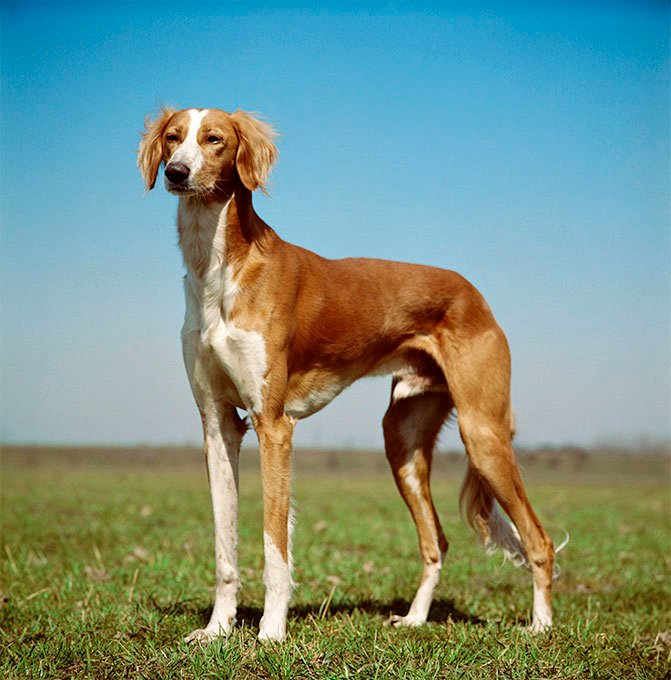

In [59]:
most_liked_dogs =  df.groupby(['dog_breed'],as_index = False)['likes'].mean()

In [60]:
most_liked = most_liked_dogs.sort_values(by=['likes'],ascending = False)[:10]
most_liked

,dog_breed,likes
54,Saluki,24060.000000
5,Bedlington_terrier,21153.166667
11,Bouvier_des_Flandres,18032.000000
23,French_bulldog,17194.100000
73,black-and-tan_coonhound,17012.000000
87,flat-coated_retriever,16791.625000
33,Irish_water_spaniel,16400.000000
39,Leonberg,14934.333333
20,English_springer,14918.111111
42,Mexican_hairless,13590.571429


Text(0, 0.5, 'The dog breed')

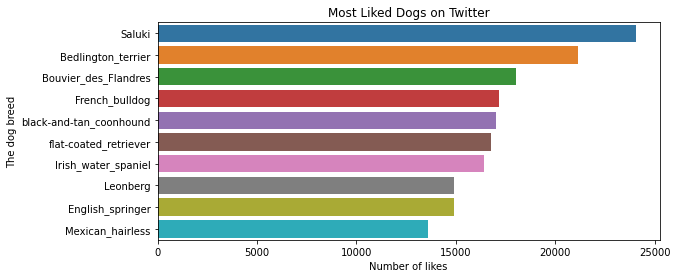

In [61]:
#visualization #1
plt.figure(figsize=(9,4))
sns.barplot(x=most_liked['likes'],y=most_liked['dog_breed']);
plt.title('Most Liked Dogs on Twitter')
plt.xlabel('Number of likes')
plt.ylabel('The dog breed')

### instight #2
<b>most common dog</b> what is the most common dog to have ?

let's find out

In [62]:
most_common_dog = df['dog_breed'].value_counts()
most_common_dog

golden_retriever      142
Labrador_retriever    103
Pembroke               94
Chihuahua              87
pug                    60
                     ... 
Japanese_spaniel        1
silky_terrier           1
Irish_wolfhound         1
EntleBucher             1
Scotch_terrier          1
Name: dog_breed, Length: 113, dtype: int64

golden retriver are adorable dogs and seems like they are the most common among dog owners

<b>but i wonder why bouvier des flanders is not that common when it is  from the top 10 liked dogs</b>

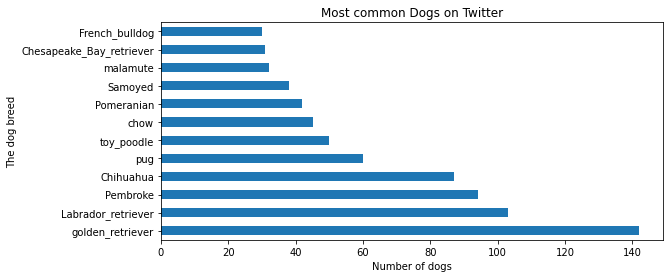

In [84]:
#visualization#2
common_dogs = df.groupby('dog_breed').filter(lambda x: len(x)>=30)
plt.figure(figsize=(9,4))
common_dogs['dog_breed'].value_counts().plot(kind = 'barh');
plt.title('Most common Dogs on Twitter')
plt.xlabel('Number of dogs')
plt.ylabel('The dog breed');

### insight #3
<b>what are the top rated dogs?</b>

In [81]:
top_rated_dogs = df.groupby('dog_breed',as_index = False)['rating'].mean()
top_rated_dogs.sort_values(by=['rating'],ascending = False,inplace = True)
top_rated =top_rated_dogs[:15]

Text(0, 0.5, 'The dog breed')

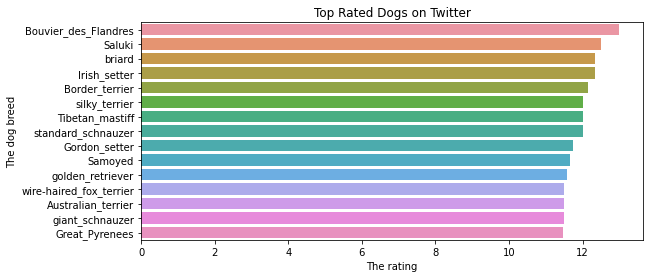

In [82]:
#visualization#3
plt.figure(figsize=(9,4))
sns.barplot(x=top_rated['rating'],y=top_rated['dog_breed']);
plt.title('Top Rated Dogs on Twitter')
plt.xlabel('The rating')
plt.ylabel('The dog breed')

In [90]:
def sum(a, b): 
    a = a + b
print (sum(5,4))

None
